# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [62]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [63]:
base_url = "http://api.openweathermap.org/data/2.5/weather?q="

json_data=[]

for city in cities:
    list_city=list(city)
    for i in range(0, len(list_city)):
        if list_city[i].isspace():
            list_city[i]="+"   
    target_url =  base_url + ''.join(list_city) + '&APPID=' + api_key
    #print(target_url)
    
    json_data.append(requests.get(target_url).json())
            


In [64]:
print(json.dumps(json_data, indent=4))
    

[
    {
        "coord": {
            "lon": 168.86,
            "lat": -46.19
        },
        "weather": [
            {
                "id": 500,
                "main": "Rain",
                "description": "light rain",
                "icon": "10d"
            }
        ],
        "base": "stations",
        "main": {
            "temp": 287.59,
            "pressure": 988,
            "humidity": 82,
            "temp_min": 287.59,
            "temp_max": 287.59
        },
        "wind": {
            "speed": 4.02,
            "deg": 308,
            "gust": 11.62
        },
        "rain": {
            "3h": 0.25
        },
        "clouds": {
            "all": 62
        },
        "dt": 1575422788,
        "sys": {
            "type": 3,
            "id": 2008959,
            "country": "NZ",
            "sunrise": 1575391711,
            "sunset": 1575447642
        },
        "timezone": 46800,
        "id": 6201424,
        "name": "Mataura",
        "cod": 200
  

In [65]:
len(json_data)


605

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [123]:
data = []
for city in json_data:
    if city['cod'] == 200:
            row=[]
            row.append(city['name'])
            row.append(city['coord']['lon'])
            row.append(city['coord']['lat'])
            row.append(city['weather'][0]['id'])
            row.append(city['weather'][0]['main'])
            row.append(city['weather'][0]['description'])
            row.append(city['weather'][0]['icon'])
            row.append(city['base'])
            row.append(city['main']['temp'])
            row.append(city['main']['pressure'])
            row.append(city['main']['humidity'])
            row.append(city['main']['temp_min'])
            row.append(city['main']['temp_max'])
            if 'sea_level' in city['main']:
                row.append(city['main']['sea_level'])
            else: 
                row.append(np.nan)
            if 'grnd_level' in city['main']:
                row.append(city['main']['grnd_level'])
            else: 
                row.append(np.nan)
            row.append(city['wind']['speed'])
            if 'deg' in city['wind']:
                row.append(city['wind']['deg'])
            else: 
                row.append(np.nan)
            row.append(city['clouds']['all'])
            row.append(city['dt'])
            row.append(city['sys']['country'])
            row.append(city['sys']['sunrise'])
            row.append(city['sys']['sunset'])
            row.append(city['timezone'])
            row.append(city['id'])
            row.append(city['cod'])
            data.append(row)      
                  


In [147]:

df = pd.DataFrame(data, columns=['City','Lng', 'Lat', 'Weather Id', 'Weather Main', 'Weather Description', 'Weather Icon',
       'Base','Main Temp','Main Pressure', 'Humidity', 'Min Temp', 'Max Temp',
      'Sea Level', 'Grnd Level','Wind Speed', 'Wind Deg', 'Cloudiness','Date','Country','Sunrise',
       'Sunset','Timezone','id','cod'])

df.head()

,City,Lng,Lat,Weather Id,Weather Main,Weather Description,Weather Icon,Base,Main Temp,Main Pressure,...,Wind Speed,Wind Deg,Cloudiness,Date,Country,Sunrise,Sunset,Timezone,id,cod
0,Mataura,168.86,-46.19,500,Rain,light rain,10d,stations,287.59,988,...,4.02,308.0,62,1575422788,NZ,1575391711,1575447642,46800,6201424,200
1,Saldanha,-6.55,41.42,800,Clear,clear sky,01n,model,274.13,1017,...,2.61,54.0,0,1575422788,PT,1575444945,1575478629,0,2737599,200
2,Taltal,-70.49,-25.41,800,Clear,clear sky,01n,model,286.98,1013,...,2.19,226.0,0,1575422788,CL,1575366203,1575415223,-10800,3870243,200
3,Storm Lake,-95.21,42.64,800,Clear,clear sky,01n,stations,273.15,1008,...,6.20,270.0,1,1575422788,US,1575380002,1575413293,-21600,4877655,200
4,Saint Marys,-78.56,41.43,804,Clouds,overcast clouds,04n,stations,271.30,1003,...,4.49,260.0,90,1575422788,US,1575375781,1575409519,-18000,5210117,200


In [148]:
weatherdf=df[['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed']]
weatherdf.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mataura,62,NZ,1575422788,82,-46.19,168.86,287.59,4.02
1,Saldanha,0,PT,1575422788,85,41.42,-6.55,274.13,2.61
2,Taltal,0,CL,1575422788,84,-25.41,-70.49,286.98,2.19
3,Storm Lake,1,US,1575422788,88,42.64,-95.21,273.71,6.20
4,Saint Marys,90,US,1575422788,92,41.43,-78.56,272.59,4.49


In [150]:
weatherdf.count()

City          546
Cloudiness    546
Country       546
Date          546
Humidity      546
Lat           546
Lng           546
Max Temp      546
Wind Speed    546
dtype: int64

In [149]:
cvsfile=df.to_csv(r'/Users/Victoria/bootcamp/CU-NYC-DATA-PT-10-2019-U-C/Homework/06-Python-APIs/Instructions/python-api-challenge/weatherpy.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

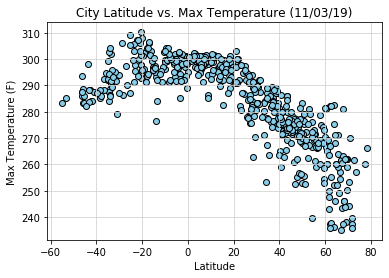

In [151]:
plt.scatter(weatherdf["Lat"],weatherdf["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (11/03/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("CityLat_MaxTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

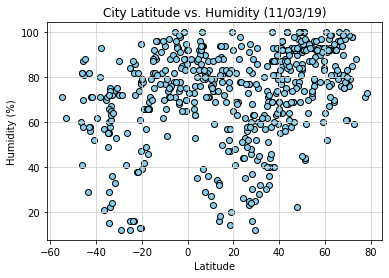

In [152]:
plt.scatter(weatherdf["Lat"],weatherdf["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (11/03/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("CityLat_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

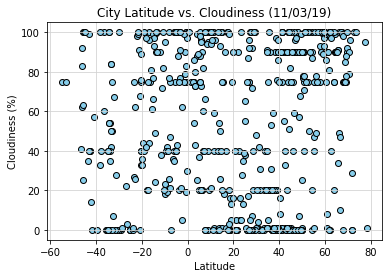

In [153]:
plt.scatter(weatherdf["Lat"],weatherdf["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (11/03/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("CityLat_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

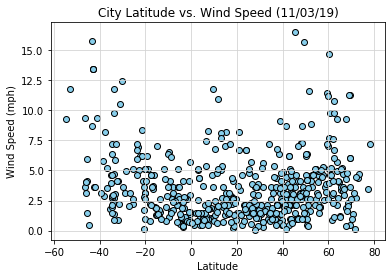

In [154]:
plt.scatter(weatherdf["Lat"],weatherdf["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (11/03/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("CityLat_WindSpeed.png")
plt.show()